# Predicting the value of Swedish auto insurance claims using machine learning techniques

Goal of this analysis is to predict the total value of a number of Swedish Auto insurance claims in fixed geographical region, given the number of claims that were made. 

Our data set contains 63 samples. 
Each sample contains two pieces of information. 
1 feature, the number of claims.
1 target, which is the total value of all the claims for a set region in Sweden. This is measured in thousands of Swedish Kronor. 

Desired outcome: Predict, with reasonable confidence, the total value of all auto insurance claims for a given Swedish geographical region, given the total number of claims that were made in that region. 

In [6]:
# Python package imports.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

First step is to read and store the data in our Machine Learning environment. 
All of the feature data is stored in 'X', which I convert into a 1D NumPy
array. All of the target data is stored in 'y', which I also convert into a 
1 D NumPy array

In [3]:
filename = 'Swedish_Auto_Insurance.txt'
with open(filename) as f:
    data = f.readlines()
X, y = [], []
for counter in range(len(data)):
    X.append(int(data[counter].split('\t')[0]))
    y.append(float(data[counter].split('\t')[1].replace(',','.').rstrip('\n')))
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

Then we should take a look at what the relationship between our feature data and the targert data looks like. 

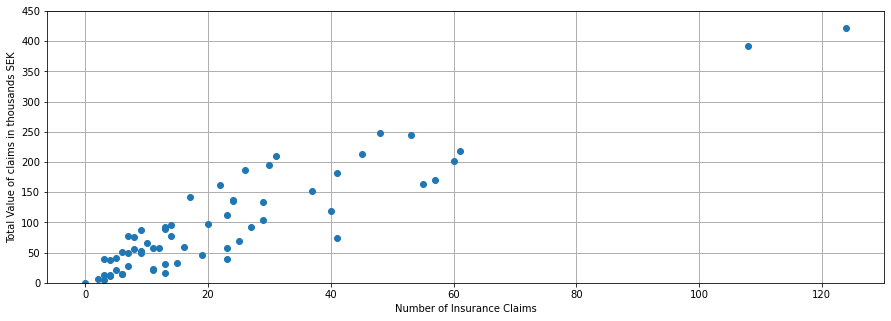

In [4]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.plot(X, y, 'o')
plt.ylim(0, 450)
plt.xlabel('Number of Insurance Claims')
plt.ylabel('Total Value of claims in thousands SEK')
plt.grid(b=True, which='both', linestyle='-', linewidth=1)

The above graph illistrates that there is a strong relationship between the feature varible, and the target response. The relationship is also exactly what would be expected, as the number of insurance claims increases, the total value of the insurance claims in that region also increases. 

# Model Number #1 is a K-nearest Neighbors Regression analysis. 


We need to split our data set into two groups, a training set and a test set. Then create a model and score the model. 
The implementation of a K-nearest Neighbors analysis is fairly simple, all that needs to be decided on is the optimal value of k. In order to figure out the optimal value of k, it is best to try many values and observe which values are yielding the best results. Below I have tested all values of k from 1 to 20. For each value I stored its training and testing results. I included a plot to show the quality of our training/testing data as a function of k. 

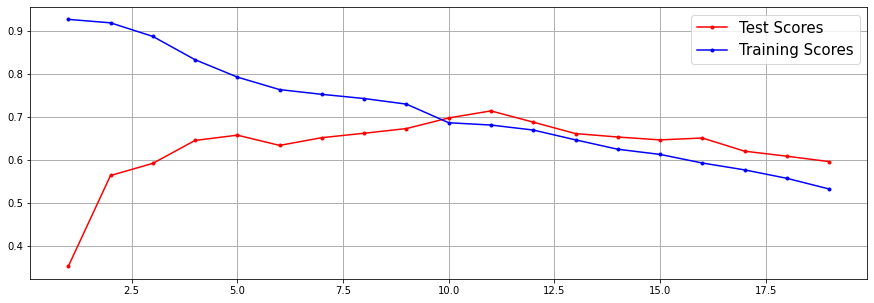

In [7]:
neighbors = list(range(1,20))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
test_scores = []
train_scores = []

for n in neighbors:
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_train, y_train)    
    test_scores.append(reg.score(X_test,y_test))
    train_scores.append(reg.score(X_train, y_train))

plt.rcParams["figure.figsize"] = [15, 5]    
plt.plot(neighbors, test_scores, '.r-')
plt.plot(neighbors, train_scores, '.b-')
plt.legend(['Test Scores', 'Training Scores'], prop={"size":15})
plt.grid(b=True, which='both', linestyle='-', linewidth=1)

The above graph illistrates that we will see the best model performance when setting k=11.
It allowed us to achieve a test score of approximately .71 
From there it is a sensible idea to visuilize how that model will behave as it encounters new data. 
In order to do that, I have created an array with 1000 data points evenly spaced across the scope of our feature variable. 
Using that array I created predictions for every one of those data points, and then plotted those predictions alongside our existing data. 

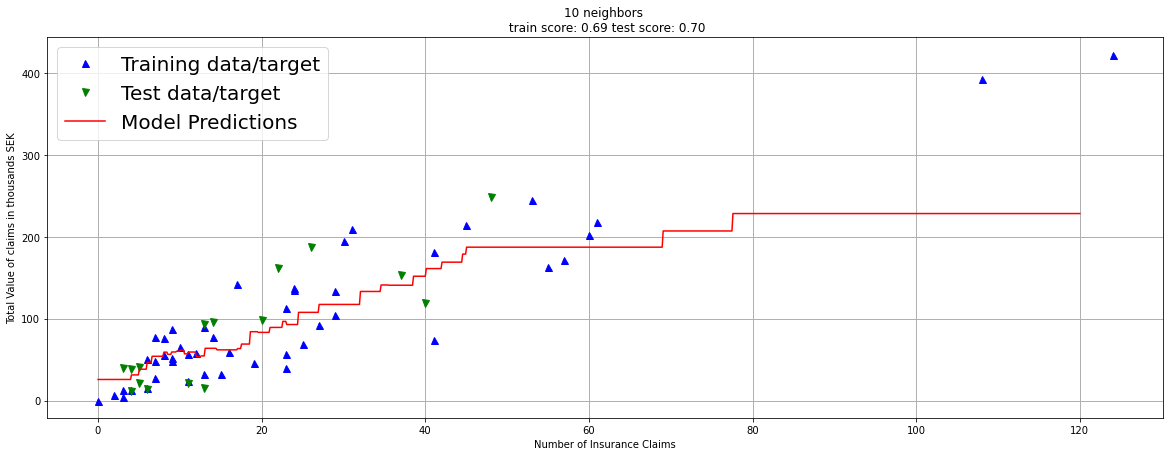

In [9]:


# Split the data into training and testing groups
# Fixed the random state in order to reproduce results. 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=10)
reg.fit(X_train, y_train)

line = np.linspace(0,120,1000).reshape(-1,1)
plt.rcParams["figure.figsize"] = [20, 7]
plt.plot(X_train, y_train, '^', c='b', markersize=7)
plt.plot(X_test, y_test, 'v', c='g', markersize=7)
plt.plot(line, reg.predict(line), c='r')

plt.xlabel('Number of Insurance Claims')
plt.ylabel('Total Value of claims in thousands SEK')
plt.title('10 neighbors \n train score: {:.2f} test score: {:.2f}'.format(
    reg.score(X_train, y_train), reg.score(X_test, y_test)))
plt.legend(['Training data/target', 'Test data/target', 'Model Predictions'], loc='best', prop={"size":20})
plt.grid(b=True, which='both', linestyle='-', linewidth=1)